In [2]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.fft
import glob as gb
import os
import seaborn as sn

from scipy.stats import *

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

## Reading files and training model

In [177]:
#read the feature ,atrix files which you found using previous feature extraction code
X_good=pd.read_csv('features_normal_col6.csv')#enter the directory here
X_bad=pd.read_csv('features_horz_algn_0.5mm_col6.csv.csv')
X_bad

,# mean_time2,mean_stft2,median_time2,median_stft2,std1_time2,std1_stft2,var_time2,var_stft2,max_time2,max_stft2,...,kurt_time2,kurt_stft2,skew_time2,skew_stft2,rms_time2,rms_stft2,crest_time2,crest_stft2,form_time2,form_stft2
0,-0.035565,0.000005,0.006182,3.819766e-09,0.365876,0.000066,0.133865,4.365849e-09,1.0971,0.002974,...,-0.661201,519.676070,0.156450,19.735182,0.367597,0.000066,2.984518,44.855922,-10.335948,12.365539
1,-0.054043,0.000008,-0.115285,3.922998e-09,0.438103,0.000111,0.191935,1.237204e-08,1.4893,0.006277,...,0.416365,961.271973,0.753600,26.829120,0.441420,0.000111,3.373886,56.293801,-8.167927,14.379315
2,0.097469,0.000009,0.120155,3.703172e-09,0.456435,0.000111,0.208332,1.233406e-08,1.3343,0.005040,...,-0.652435,558.403790,0.058225,20.691875,0.466721,0.000111,2.858882,45.245691,4.788412,12.910975
3,0.010234,0.000008,-0.030516,3.802960e-09,0.452250,0.000096,0.204530,9.189463e-09,1.1398,0.003589,...,-0.943170,351.646187,0.273200,17.037691,0.452362,0.000096,2.519666,37.305746,44.200950,11.877823
4,-0.005244,0.000007,-0.056846,3.665208e-09,0.430724,0.000087,0.185524,7.499483e-09,1.1390,0.002900,...,-0.908176,360.945606,0.153749,17.133823,0.430752,0.000087,2.644213,33.365914,-82.143557,11.863918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.094489,0.000007,0.095853,9.905177e-08,0.405017,0.000044,0.164039,1.916281e-09,1.5940,0.001803,...,-0.013852,359.043412,-0.059843,16.136233,0.415889,0.000044,4.324715,40.706463,4.401474,6.488326
246,-0.018629,0.000006,-0.022274,9.783142e-08,0.389532,0.000034,0.151735,1.139091e-09,1.6735,0.001274,...,0.050884,310.947272,0.032980,14.652111,0.389973,0.000034,4.291318,37.167992,-20.933559,5.688164
247,-0.207658,0.000008,-0.206380,9.916042e-08,0.397711,0.000056,0.158174,3.102389e-09,1.3777,0.001889,...,-0.085018,332.066713,-0.019002,15.924657,0.448657,0.000056,4.188504,33.568595,-2.160560,7.017455
248,0.026853,0.000006,0.031285,9.647014e-08,0.396725,0.000037,0.157391,1.395296e-09,1.5711,0.001356,...,0.016504,349.138311,-0.056252,15.700503,0.397629,0.000038,4.521806,35.794597,14.807561,6.027491


In [178]:
X_combined=X_good.append(X_bad)
#np.savetxt('combined1.csv',X_combined, delimiter=",")#Use this if you want to save it in your computer as csv file
X_combined

,# mean_time2,mean_stft2,median_time2,median_stft2,std1_time2,std1_stft2,var_time2,var_stft2,max_time2,max_stft2,...,kurt_time2,kurt_stft2,skew_time2,skew_stft2,rms_time2,rms_stft2,crest_time2,crest_stft2,form_time2,form_stft2
0,0.074216,0.000002,0.063057,3.769481e-09,0.181134,0.000020,0.032810,3.964919e-10,0.64369,0.000934,...,-0.346160,622.667783,0.163593,22.146538,0.195747,0.000020,3.288373,46.789373,2.637517,13.178264
1,0.029079,0.000002,0.030755,3.680710e-09,0.192753,0.000018,0.037154,3.256329e-10,0.58000,0.000771,...,-0.415490,500.841642,-0.075241,19.826268,0.194932,0.000018,3.693486,42.576194,6.703476,12.049209
2,-0.124610,0.000002,-0.128270,3.739522e-09,0.195373,0.000026,0.038171,7.006133e-10,0.49489,0.001010,...,-0.438791,473.959791,0.066585,19.543208,0.231728,0.000027,3.411721,38.050664,-1.859622,12.419740
3,0.004242,0.000001,0.000190,3.783157e-09,0.180039,0.000017,0.032414,2.835318e-10,0.65547,0.000900,...,0.003555,693.846383,0.206039,23.211766,0.180087,0.000017,3.639739,53.292752,42.458300,13.117177
4,0.041926,0.000001,0.044716,3.799547e-09,0.176005,0.000015,0.030978,2.119878e-10,0.53201,0.000571,...,-0.682869,384.162640,-0.065819,17.424784,0.180928,0.000015,2.940445,39.053029,4.315415,11.188376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.094489,0.000007,0.095853,9.905177e-08,0.405017,0.000044,0.164039,1.916281e-09,1.59400,0.001803,...,-0.013852,359.043412,-0.059843,16.136233,0.415889,0.000044,4.324715,40.706463,4.401474,6.488326
246,-0.018629,0.000006,-0.022274,9.783142e-08,0.389532,0.000034,0.151735,1.139091e-09,1.67350,0.001274,...,0.050884,310.947272,0.032980,14.652111,0.389973,0.000034,4.291318,37.167992,-20.933559,5.688164
247,-0.207658,0.000008,-0.206380,9.916042e-08,0.397711,0.000056,0.158174,3.102389e-09,1.37770,0.001889,...,-0.085018,332.066713,-0.019002,15.924657,0.448657,0.000056,4.188504,33.568595,-2.160560,7.017455
248,0.026853,0.000006,0.031285,9.647014e-08,0.396725,0.000037,0.157391,1.395296e-09,1.57110,0.001356,...,0.016504,349.138311,-0.056252,15.700503,0.397629,0.000038,4.521806,35.794597,14.807561,6.027491


In [7]:
#assign labels as per the file description
Y=[0]*245+[1]*250

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combined, Y, test_size=0.33, random_state=42)


In [180]:
X_train

,# mean_time2,mean_stft2,median_time2,median_stft2,std1_time2,std1_stft2,var_time2,var_stft2,max_time2,max_stft2,...,kurt_time2,kurt_stft2,skew_time2,skew_stft2,rms_time2,rms_stft2,crest_time2,crest_stft2,form_time2,form_stft2
203,0.077533,0.000006,0.093433,6.807290e-08,0.378309,0.000032,0.143118,1.052685e-09,1.56880,0.001022,...,0.123015,192.496546,-0.234106,11.876091,0.386169,0.000033,4.739122,30.995978,4.980697,5.577816
108,0.038377,0.000003,0.042045,2.668890e-08,0.269183,0.000023,0.072459,5.081612e-10,1.26690,0.000856,...,-0.137646,311.501013,0.001314,15.460345,0.271902,0.000023,4.659398,37.659077,7.084981,7.738030
37,-0.057360,0.000002,-0.028355,8.836588e-09,0.228497,0.000028,0.052211,7.624038e-10,0.60985,0.001204,...,-0.396222,540.835332,-0.368447,21.082161,0.235584,0.000028,3.545183,43.470321,-4.107154,12.557104
157,0.019067,0.000007,0.011206,4.904293e-08,0.405714,0.000054,0.164604,2.863447e-09,1.54390,0.002234,...,-0.237120,411.818013,0.137740,17.351914,0.406157,0.000054,3.801235,41.433109,21.301094,8.206702
216,-0.037775,0.000006,-0.041899,6.906137e-08,0.374297,0.000029,0.140098,8.615547e-10,1.47480,0.000858,...,0.118577,192.138884,0.010689,11.953063,0.376195,0.000030,4.459927,28.722239,-9.958698,5.341179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.125216,0.000003,-0.127365,2.680536e-08,0.249519,0.000027,0.062260,7.338064e-10,0.83407,0.000980,...,-0.058059,473.174967,0.014754,19.092079,0.279173,0.000027,3.953463,35.930292,-2.229537,8.860909
25,0.017092,0.000014,-0.071231,5.947215e-09,0.584599,0.000152,0.341756,2.324046e-08,1.50710,0.005423,...,-1.158712,322.070694,0.266893,15.988317,0.584843,0.000153,2.576931,35.432965,34.217340,11.264521
103,0.005807,0.000003,0.006833,2.466316e-08,0.262613,0.000022,0.068966,4.770860e-10,1.18870,0.000866,...,0.064049,472.816185,0.014630,18.908548,0.262675,0.000022,4.525369,39.326759,45.234972,8.046603
190,0.034245,0.000005,0.044925,6.192593e-08,0.347526,0.000027,0.120774,7.434188e-10,1.76340,0.001519,...,0.224032,472.287127,-0.090838,16.350505,0.349205,0.000028,5.049751,54.824335,10.197230,5.683611


In [181]:
X_test

,# mean_time2,mean_stft2,median_time2,median_stft2,std1_time2,std1_stft2,var_time2,var_stft2,max_time2,max_stft2,...,kurt_time2,kurt_stft2,skew_time2,skew_stft2,rms_time2,rms_stft2,crest_time2,crest_stft2,form_time2,form_stft2
211,0.048372,0.000007,0.050323,6.852314e-08,0.405133,0.000036,0.164133,1.293384e-09,1.84360,0.001053,...,-0.039504,190.457388,-0.011640,11.862891,0.408006,0.000037,4.518559,28.794251,8.434843,5.528578
73,0.241227,0.000005,0.242655,1.677909e-08,0.263003,0.000059,0.069170,3.467709e-09,1.30380,0.002669,...,0.020360,571.270618,0.068648,20.820725,0.356874,0.000059,3.653387,45.152347,1.479415,11.645266
65,-0.077192,0.000002,-0.073231,1.464572e-08,0.201618,0.000019,0.040650,3.559072e-10,0.82285,0.000890,...,-0.070796,621.923010,-0.074393,22.095237,0.215888,0.000019,4.226629,46.977166,-2.796778,10.253942
175,-0.003332,0.000008,-0.016773,5.711455e-08,0.447490,0.000060,0.200247,3.602982e-09,1.83300,0.002943,...,0.084939,546.567028,0.154868,19.347359,0.447498,0.000061,4.096107,48.603758,-134.306100,7.632179
88,-0.076429,0.000009,-0.104340,2.015731e-08,0.458827,0.000087,0.210522,7.567073e-09,1.25710,0.002611,...,-0.927907,266.076898,0.088682,15.000800,0.465144,0.000087,2.937154,29.875073,-6.085993,10.172938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,0.005780,0.000009,0.037286,6.603778e-09,0.482627,0.000107,0.232928,1.137425e-08,1.29820,0.003646,...,-0.983781,304.793471,0.070004,15.782212,0.482656,0.000107,2.689699,34.056614,83.506918,11.561382
112,-0.021639,0.000003,-0.022023,2.618484e-08,0.293163,0.000028,0.085945,7.709902e-10,1.11850,0.001125,...,-0.102738,451.013703,0.046764,18.283022,0.293958,0.000028,3.804967,40.202497,-13.584894,8.155477
185,-0.008891,0.000008,-0.004119,6.112967e-08,0.439744,0.000068,0.193375,4.674412e-09,1.59340,0.003398,...,-0.081377,458.520796,-0.076433,18.524895,0.439830,0.000069,4.128415,49.391316,-49.466388,8.958159
26,0.028346,0.000011,-0.028432,6.529643e-09,0.527641,0.000128,0.278405,1.625936e-08,1.35270,0.004477,...,-1.087064,330.133917,0.310915,16.299236,0.528396,0.000128,2.560010,34.981197,18.640804,11.558163


In [182]:
#scaling the trains and tests. Remember scaling changes type from dataframe to array
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [183]:
#Train the model
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [184]:
#find  the predictions and print accuracy
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.6036585365853658


In [40]:
#Use below if you want to save the files
np.savetxt('pred_1.csv',y_pred,delimiter=',')

np.savetxt('org_1.csv',y_test,delimiter=',')
np.savetxt('X_test.csv',X_test,delimiter=',')

In [125]:
print(y_test)
print(y_pred)

[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0]
[0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0
 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0
 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0
 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0]


In [130]:
#Print other metrics of model
print(classifier.intercept_)
print(classifier.coef_)
print(classifier.predict_proba(X_test))
conf_matrix=confusion_matrix(y_test, y_pred)

[-0.17037803]
[[ 1.03028599  0.95034531 -0.63122377  1.80285938 -0.07281193 -2.55705675
   0.95336037 -0.92625573 -0.05243606 -1.05588649 -0.92483001  0.04693339
   1.17388163  2.28934472 -2.13642346  1.11308431 -0.07275972 -2.35593442
  -0.99948539  0.94679907 -0.07276605 -3.00423838]]
[[8.71664421e-01 1.28335579e-01]
 [6.90092826e-01 3.09907174e-01]
 [5.46705411e-02 9.45329459e-01]
 [9.99996424e-01 3.57603606e-06]
 [1.12833774e-01 8.87166226e-01]
 [9.94182467e-01 5.81753280e-03]
 [9.85777276e-01 1.42227236e-02]
 [8.24515720e-01 1.75484280e-01]
 [1.46346614e-01 8.53653386e-01]
 [8.39344463e-01 1.60655537e-01]
 [8.93406260e-01 1.06593740e-01]
 [9.85131907e-01 1.48680926e-02]
 [3.82317145e-01 6.17682855e-01]
 [9.51260869e-01 4.87391306e-02]
 [9.54285023e-01 4.57149774e-02]
 [2.12211139e-01 7.87788861e-01]
 [1.48606987e-03 9.98513930e-01]
 [9.91096380e-01 8.90362048e-03]
 [9.80545327e-01 1.94546734e-02]
 [1.61261118e-01 8.38738882e-01]
 [3.26452819e-02 9.67354718e-01]
 [8.93851043e-02 9.

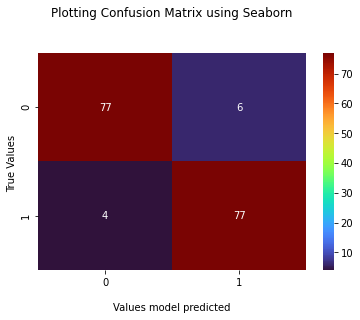

In [131]:
fx = sns.heatmap(conf_matrix, annot=True, cmap='turbo')
fx.set_title('Plotting Confusion Matrix using Seaborn\n\n');
fx.set_xlabel('\nValues model predicted')
fx.set_ylabel('True Values ');

In [128]:
#RUN THIS ONCE
pred_all=[y_test,[0]*len(y_pred),[0]*len(y_pred),[0]*len(y_pred),[0]*len(y_pred),[0]*len(y_pred),[0]*len(y_pred)]
#I have made 7 columns (1 for original labels, 6 for the predictions from 6 columns of the dataset)

In [176]:
# Run this everytime after you generate a new prediction BUT MAKE SURE TO CHANGE THE COLUMN NUMBER
# To generate new prediction, change the feature column you read initially and then run all the above codes again
pred_all[1]=y_pred.tolist()

## Combining all predictions into one

In [185]:
#DO NOT RUN THIS UNTIL ALL PREDICTIONS ARE MADE
pred_all=np.array(pred_all,dtype=object)
pred_all=np.transpose(pred_all)
pred_all

array([[1, 1, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=object)

In [187]:
np.savetxt("pred_all.csv",pred_all,delimiter=',')

### Reading the saved file

In [216]:
pred_all_reading=pd.read_csv('pred_all.csv')
pred_all_reading

,Y_test,pred1,pred2,pred3,pred4,pred5,pred6
0,1,1,0,1,1,1,1
1,0,1,0,0,1,0,0
2,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0
4,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...
159,0,0,0,0,1,0,0
160,1,1,1,1,1,1,1
161,0,0,0,0,0,0,0
162,0,0,0,0,1,0,0


In [217]:
pred_final=[]
for i in range(pred_all_reading.shape[0]):
    flag=pred_all_reading.iat[i,1]
    count=0
    for j in range(6):
        if (flag==pred_all_reading.iat[i,j]):
            count+=1
    if(count>=4):
        pred_final.append(flag)
    else:
        pred_final.append(int(not(flag)))
    
pred_final   

[1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0]

In [218]:
pred_all_reading['pred_final']=pred_final
pred_all_reading

,Y_test,pred1,pred2,pred3,pred4,pred5,pred6,pred_final
0,1,1,0,1,1,1,1,1
1,0,1,0,0,1,0,0,0
2,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...
159,0,0,0,0,1,0,0,0
160,1,1,1,1,1,1,1,1
161,0,0,0,0,0,0,0,0
162,0,0,0,0,1,0,0,0


In [219]:
print ("Accuracy : ", accuracy_score(y_test, pred_final))

Accuracy :  1.0
